# Machine-learning-based models in particle-in-cell codes for advanced physics extensions: Compton Scattering

Paper: https://www.cambridge.org/core/journals/journal-of-plasma-physics/article/abs/machinelearningbased-models-in-particleincell-codes-for-advanced-physics-extensions/9D34BB83508AF220EC60EF892079D053

Notebook by: Óscar Amaro (June 2023)


Figure 4: Scattered photon momentum distribution resulting from inverse Compton scattering with an electron beam with momentum $p_e$. The three peaks correspond to three initial monoenergetic electron beams with $p_e = 25, 50$ and $100 ~m_ec$ interacting with a monoenergetic photon gas with energy $2.5 ~m_ec^2$. __However__, the lack of a sharp discontinuity/cutoff in the photon spectrum indicates that perhaps at least one of the particle species had a non-zero temperature.

Legend:
- black dots: data from paper retrieved with [WPD](https://apps.automeris.io/wpd/)
- red line: theoretical spectrum for monoenergetic electron and photon beams (see Mathematica notebook)
- blue histogram: OSIRIS simulations for monoenergetic electron and photon beams, with Neural-Network module __on__

In [1]:
import numpy as np
from numpy import log, log10, sin, cos, exp, sqrt, pi
import pandas as pd
import glob as glob
import h5py
# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm

import json

# warnings
import warnings
warnings.simplefilter('ignore')

def arraycenter(x):
    """
        returns centered array for histograms
    """
    return np.array([(x[i]+x[i+1])/2 for i in range(len(x)-1)])

In [2]:
# analytical final photon momenta distribution (see Mathematica notebook)
def dNdpg(pg, eps=2.5, pe=100):
    """
    input:
        pg - final photon momentum [m c]  
        eps - initial photon energy [m c^2]
        pe - initial electron momentum [m c]
    intermediate: 
        epsp - final photon energy [m c^2]  
        ge - initial electron gamma factor, beta associated
    output:
        dNdpg - distribution in final photon momentum
    """
    g = sqrt(1 + pe**2);
    beta = sqrt(1 - 1/g**2);
    epsp = pg; #sqrt(1+pg**2);
    
    res =  g*(g-epsp)*( ((beta-1)**3*g**3*(g-epsp))/((beta-1)*g*(g-epsp)-epsp) + (beta-1)*g*epsp/(epsp-g) + ((beta-1)*g*eps*(g-epsp)+epsp)**2/(eps*(g-epsp))**2 ) / (2*sqrt(2*(1+beta)*g*eps*(g-epsp)-epsp)*sqrt(epsp)*(epsp+(beta-1)*g*(epsp-g))**2)
    return np.heaviside(pe-pg,0) * res
dNdpg = np.vectorize(dNdpg)

### Prepare data for plotting

In [ ]:
# get WPD data from paper
f = open('dataWPD/fig4/wpd.json')
data = json.load(f)
# spectrum1_WPD
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
spectrum1_WPD_x = datatmp2[:,0][indxs]
spectrum1_WPD_y = datatmp2[:,1][indxs]
# spectrum2_WPD
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
spectrum2_WPD_x = datatmp2[:,0][indxs]
spectrum2_WPD_y = datatmp2[:,1][indxs]
# spectrum3_WPD
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
spectrum3_WPD_x = datatmp2[:,0][indxs]
spectrum3_WPD_y = datatmp2[:,1][indxs]

# compute theoretical spectrum
enelst = np.linspace(3,101,100)
y2 = dNdpg(enelst, 2.5, 25); y2[np.isnan(y2)] = 0; spectrum1_th_y = np.copy(y2);
y2 = dNdpg(enelst, 2.5, 50); y2[np.isnan(y2)] = 0; spectrum2_th_y = np.copy(y2);
y2 = dNdpg(enelst, 2.5, 100); y2[np.isnan(y2)] = 0; spectrum3_th_y = np.copy(y2);

# osiris data
files = glob.glob('osiris/pe025gg25AIon_test3/MS/RAW/photons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
enedist = np.array(filef['ene'])
qdist = np.array(filef['q'])
indxs = qdist<1e11
qdist = qdist[indxs]
enedist = enedist[indxs]
ytmp, xtmp = np.histogram(enedist, enelst, weights = qdist)
spectrum1_os_y, spectrum1_os_x = ytmp, arraycenter(xtmp)
#
files = glob.glob('osiris/pe050gg25AIon_test3/MS/RAW/photons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
enedist = np.array(filef['ene'])
qdist = np.array(filef['q'])
indxs = qdist<1e11
qdist = qdist[indxs]
enedist = enedist[indxs]
ytmp, xtmp = np.histogram(enedist, enelst, weights = qdist)
spectrum2_os_y, spectrum2_os_x = ytmp, arraycenter(xtmp)
#
files = glob.glob('osiris/pe100gg25AIon_test3/MS/RAW/photons/*.h5')
files.sort()
filef = h5py.File(files[-1], 'r')
enedist = np.array(filef['ene'])
qdist = np.array(filef['q'])
indxs = qdist<1e11
qdist = qdist[indxs]
enedist = enedist[indxs]
ytmp, xtmp = np.histogram(enedist, enelst, weights = qdist)
spectrum3_os_y, spectrum3_os_x = ytmp, arraycenter(xtmp)


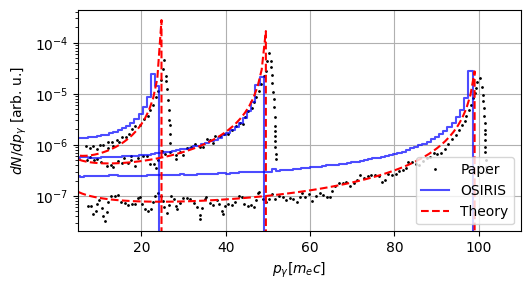

In [31]:
# plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
mrkrsz = 2

axes.plot(spectrum1_WPD_x, spectrum1_WPD_y, 'k.', markersize=mrkrsz, label=r'Paper')
axes.plot(spectrum2_WPD_x, spectrum2_WPD_y, 'k.', markersize=mrkrsz)
axes.plot(spectrum3_WPD_x, spectrum3_WPD_y, 'k.', markersize=mrkrsz)

mltp = 2e-7
axes.step(spectrum1_os_x, spectrum1_os_y*mltp, 'b', alpha=.7, label=r'OSIRIS')
axes.step(spectrum2_os_x, spectrum2_os_y*mltp, 'b', alpha=.7)
axes.step(spectrum3_os_x, spectrum3_os_y*mltp, 'b', alpha=.7)

mltp = 1e-3
axes.plot(enelst, spectrum1_th_y*mltp, 'r--', label=r'Theory')
axes.plot(enelst, spectrum2_th_y*mltp*2, 'r--')
axes.plot(enelst, spectrum3_th_y*mltp, 'r--')


axes.grid()
axes.set_xlim([5,110])
axes.set_yscale('log')
# aspect
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (np.log10(ymax)-np.log10(ymin))/(xmax-xmin)
axes.set_aspect(aspect=1/2/axesratio)
axes.set_xlabel(r'$p_\gamma[m_e c]$')
axes.set_ylabel(r'$dN/dp_\gamma$ [arb. u.]')
axes.legend(loc='lower right')

plt.tight_layout()
#plt.savefig('fig4.pdf', transparent=True)
plt.show()